In [1]:
import numpy as np
from sklearn.datasets import make_classification

X,y = make_classification(n_samples=100,n_features=2,n_informative=1,n_redundant=0,n_classes=2,n_clusters_per_class=1,random_state=41,hypercube=False,class_sep=10)

In [2]:
import matplotlib.pyplot as plt

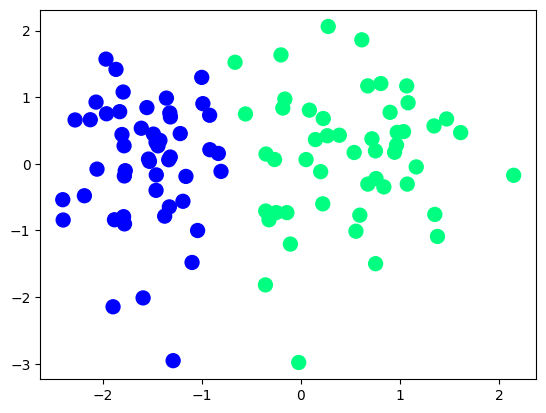

In [3]:
fig , ax = plt.subplots()
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)

In [4]:
def Perceptron(X,y):
    X = np.insert(X,0,1,axis=1)
    # intial random weights
    weights = np.ones(X.shape[1])
    lr = 0.1
    
    for i in range(1000):
        j = np.random.randint(0,100)
        y_cap = step(np.dot(X[j],weights))
        # Updating the weights using learning rate
        weights = weights + lr* (y[j]-y_cap)*X[j]
        
    return weights[0],weights[1:]

In [5]:
def step(z):
    return 1 if z>0 else 0

In [6]:
intercept,__coef = Perceptron(X,y)
__coef,intercept

(array([1.38528823, 0.13896533]), 0.9)

#### Thats it, you have trained and created a model but to plot the model we need to plot a line 

In [7]:
m = - (__coef[0]/__coef[1])
b = - (intercept/__coef[1])

In [8]:
x_input = np.linspace(-3,3,100)
y_input = m*x_input + b

(-3.0, 2.0)

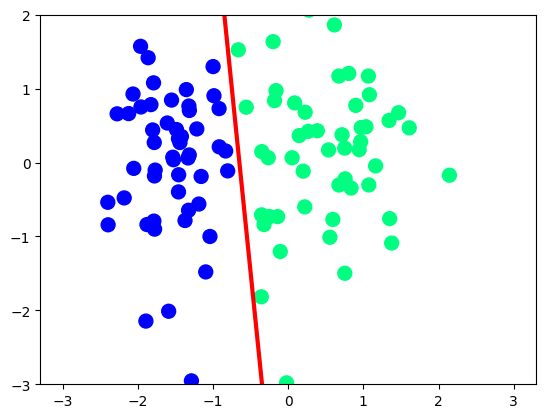

In [9]:
fig, ax = plt.subplots()

ax.plot(x_input,y_input,'r',linewidth=3)
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
ax.set_ylim(-3,2)

#### Done

### Lets animate the Training Phase, why not its cool to look at

In [10]:
def perceptron_animate(X,y):
    m = []
    b = []
    
    # Paramater initialization
    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr=0.1
    
    # Training 
    for i in range(100):
        j = np.random.randint(0,100)
        y_cap = step(np.dot(X[j],weights))
        weights = weights + lr * (y[j]-y_cap)*X[j]
        
        # storing the immediate values of m and b which will be later needed for animation
        m.append(- (weights[1]/weights[2]))
        b.append(- (weights[0]/weights[2]))
    
    return m,b
        
    

In [11]:
m, b = perceptron_animate(X,y)

#### Lets switch matplotlib's mode of output for interactive plot

In [12]:
from matplotlib.animation import FuncAnimation
import matplotlib.animation as animation

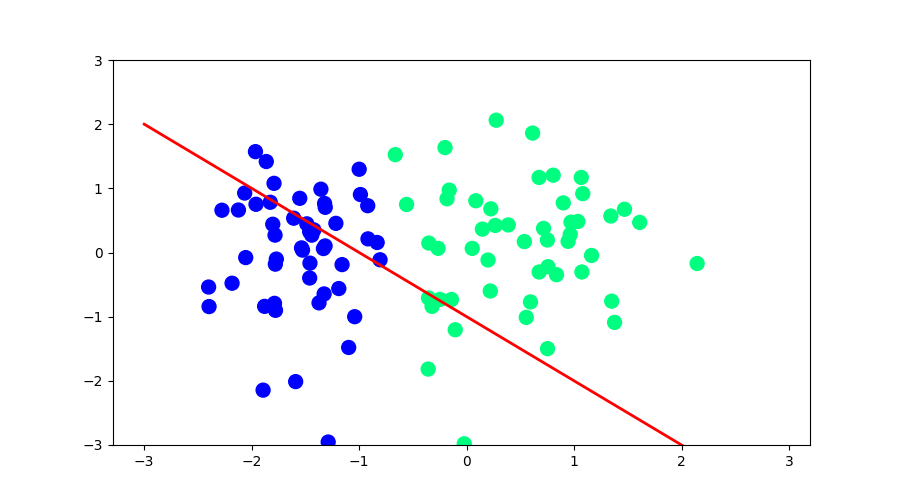

In [13]:
%matplotlib ipympl
fig , ax = plt.subplots(figsize=(9,5))

# Initial Inputs for plot
x_i = np.arange(-3,3,0.1)
y_i = x_i*m[0] + b[0]
ax.scatter(X[:,0],X[:,1],c=y,cmap='winter',s=100)
line ,  = ax.plot(x_i,y_i, 'r-',linewidth=2)
ax.set_ylim(-3,3)


# writing a function that gets executed for everyy frames in animation
def update(i):
    label = f'epochs {i+1}'
    line.set_ydata(x_i*m[i] + b[i]) # giving new equation for the line
    ax.set_xlabel(label)            # updatin epocs number on every frame

anim = FuncAnimation(fig, update,repeat=True,frames=200,interval=100)